## 3주차 과제 (FEATURE명 없는 데이터터)

#### 데이터 로드  

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/Inhusa/AI-class/refs/heads/main/3%20week/car_evaluation.csv"
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### 데이터 Feature Name 설정  

In [ ]:
df.columns = ['Price', 'Maint', 'Doors', 'Persons', 'Lug_capacity', 'Safety', 'Output']
df.isnull().sum()

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype=object)

#### 인코딩  

In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = {}
for column in df.columns:
    labelencoder[column] = LabelEncoder()
    df[column] = labelencoder[column].fit_transform(df[column])

df

,Price,Maint,Doors,Persons,Lug_capacity,Safety,Output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


#### 학습 타겟 설정 및 데이터 분리  

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("==================== Decision Tree ========================")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.2f}")
print(classification_report(y_test, dt_pred),"\n\n")

==================== Decision Tree ========================
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346
 




#### 학습 및 평가  

- RainForest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("==================== Random Forest ========================")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(classification_report(y_test, rf_pred),"\n\n")

==================== Random Forest ========================
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346
 




- SVM

In [17]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("================ Support Vector Machine ====================")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(classification_report(y_test, svm_pred),"\n\n")

================ Support Vector Machine ====================
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        83
           1       1.00      0.45      0.62        11
           2       0.92      0.99      0.95       235
           3       0.94      0.88      0.91        17

    accuracy                           0.91       346
   macro avg       0.93      0.77      0.83       346
weighted avg       0.91      0.91      0.91       346
 




- LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("================= Logistic Regression ====================")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")
print(classification_report(y_test, lr_pred))


================= Logistic Regression ====================
Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



c:\Users\outla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\outla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\outla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test,knn_pred)
print("================= K-Nearest Neighbors ====================")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(classification_report(y_test, knn_pred))

================= K-Nearest Neighbors ====================
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        83
           1       0.40      0.55      0.46        11
           2       0.91      0.97      0.94       235
           3       1.00      0.41      0.58        17

    accuracy                           0.86       346
   macro avg       0.77      0.65      0.68       346
weighted avg       0.87      0.86      0.86       346



- 혼동행렬 시각화 &rarr; ChapGPT Code

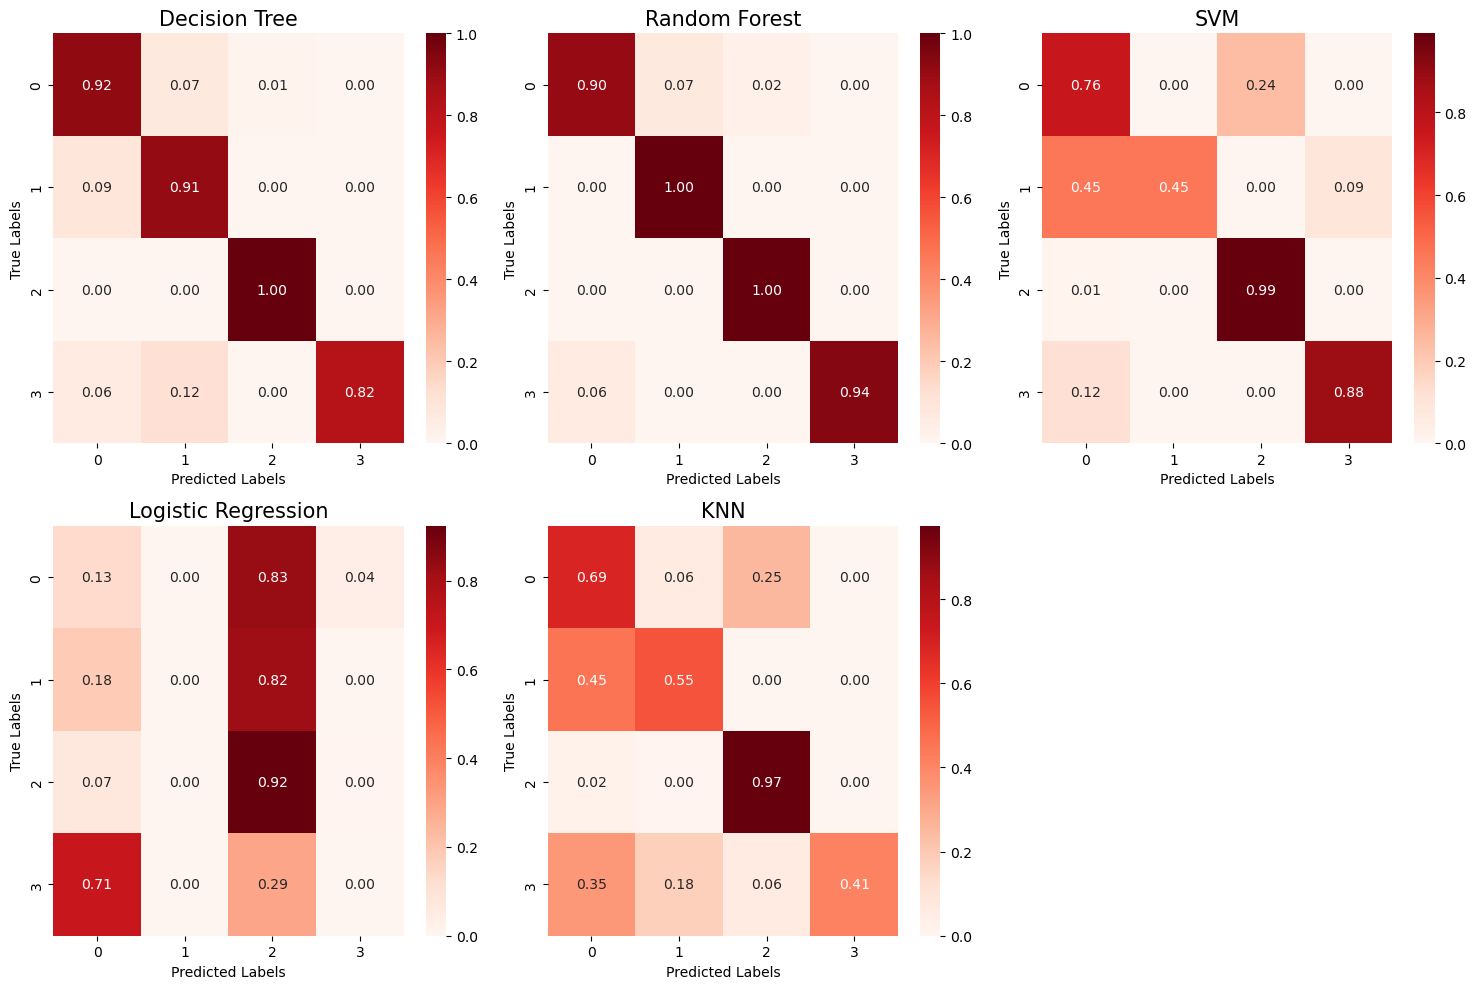

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 모델 리스트와 이름
models = [dt_model, rf_model, svm_model, lr_model, knn_model]
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 'KNN']

# 서브플롯 설정: 한 행에 3개씩 배치
n_cols = 3  # 한 행에 표시할 그래프 수
n_rows = (len(models) + n_cols - 1) // n_cols  # 필요한 행 개수 계산
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))  # 서브플롯 크기 조정
axes = axes.flatten()  # 2차원 배열을 1차원 배열로 변환

# 각 모델에 대해 혼동행렬 생성 및 서브플롯에 추가
for i, (model, name) in enumerate(zip(models, model_names)):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the data
    
    # 각 서브플롯에 그리기
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds', ax=axes[i])
    axes[i].set_title(name, fontsize=15)
    axes[i].set_xlabel('Predicted Labels', fontsize=10)
    axes[i].set_ylabel('True Labels', fontsize=10)

# 빈 서브플롯 제거 (남는 subplot이 있을 경우)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()
